In [8]:
import numpy as np
import pandas as pd

"""
None: Pythonic missing data
"""

# None objects as missing values
arr1 = np.array([1, None, 3, 4])
print(arr1.dtype)

arr2 = np.array([1, 2, 3, 4])
print(arr2.dtype)

object
int32


In [9]:
# Python objects are incompatible with numpy and pandas operations
arr1.sum()

arr2.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [7]:

"""
NaN: Missing Numerical Data
"""

arr3 = np.array([1, np.nan, 3, 4])
print(arr3.dtype)


# Arithmetic with NaN will be another NaN

print(1 + np.nan)
print(0 * np.nan)
print(arr3.sum())


# Special NumPy aggregation funcs that ignore these missing values
print(np.nansum(arr3))
print(np.nanmax(arr3))
print(np.nanmin(arr3))


# Pandas automatically converts the None to a NaN value.

pd.Series([1, np.nan, 2, None])

float64
nan
nan
nan
8.0
4.0
1.0


0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [11]:

"""
Detecting null values
"""

# isnull()

ser = pd.Series([1, np.nan, 'hello', None])
ser.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [13]:
# notnull()

ser.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [15]:

"""
Dropping null values
"""

# dropna()
ser.dropna()

0        1
2    hello
dtype: object

In [16]:
# For a DataFrame, there are more options

df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [np.nan, 4,      6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [17]:
# df.dropna(): list-wise deletion
df.dropna()

,0,1,2
1,2.0,3.0,5


In [18]:
# df.dropna(axis='columns'): variable deletion
df.dropna(axis='columns')


,2
0,2
1,5
2,6


In [19]:
# how/thresh parameters
df[3] = np.nan
df


,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [20]:
# how='any' (default)
# how='all' which will only drop rows/columns that are all null values
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [21]:
# thresh = minimum number of non-null values to be kept
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


In [23]:
"""
Filling Null Values
"""

ser = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
ser

# Fill null values with a certain value
ser.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

In [24]:
# Forward-fill = LOCF
ser.fillna(method='ffill') # equals to "ser.ffill()"

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

In [25]:
# backward-fill = NOCB
ser.fillna(method='bfill') # equals to "ser.bfill()"

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

In [26]:
# bfill with rows
df.fillna(method='bfill', axis='rows')

,0,1,2,3
0,1.0,3.0,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [28]:

from pandas import datetime
from matplotlib import pyplot as plt

"""
Load AirQualityUCI Data
"""

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

input_file = './data/AirQualityUCI_refined.csv'

df = pd.read_csv(input_file,
                 index_col=[0],
                 parse_dates=[0],
                 date_parser=parser)


# Print the summary of the dataset

df.head()


<ipython-input-28-1401ed9b7986>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


,CO(GT),PT08.S1(CO),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),RH,AH,C6H6(GT)
Datetime,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,1046.0,166.0,1056.0,113.0,1692.0,1268.0,48.9,0.7578,11.9
2004-03-10 19:00:00,2.0,1292.0,955.0,103.0,1174.0,92.0,1559.0,972.0,47.7,0.7255,9.4
2004-03-10 20:00:00,2.2,1402.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,54.0,0.7502,9.0
2004-03-10 21:00:00,2.2,1376.0,948.0,172.0,1092.0,122.0,1584.0,1203.0,60.0,0.7867,9.2
2004-03-10 22:00:00,1.6,1272.0,836.0,131.0,1205.0,116.0,1490.0,1110.0,59.6,0.7888,6.5


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7765 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   PT08.S2(NMHC)  8991 non-null   float64
 3   NOx(GT)        7718 non-null   float64
 4   PT08.S3(NOx)   8991 non-null   float64
 5   NO2(GT)        7715 non-null   float64
 6   PT08.S4(NO2)   8991 non-null   float64
 7   PT08.S5(O3)    8991 non-null   float64
 8   RH             8991 non-null   float64
 9   AH             8991 non-null   float64
 10  C6H6(GT)       9357 non-null   float64
dtypes: float64(11)
memory usage: 877.2 KB


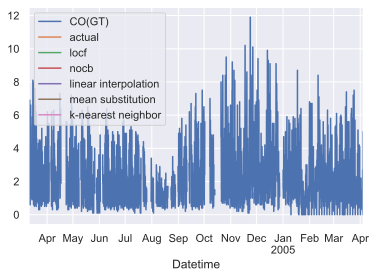

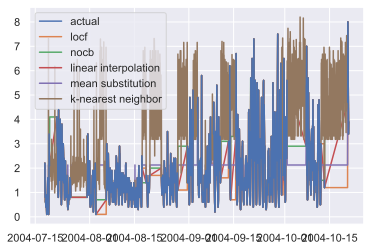

In [31]:

# Visualization setup
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles
%config InlineBackend.figure_format = 'svg'


# Visualize the series of CO(GT)

df['CO(GT)'].plot()


# imputation

imp_locf = df['CO(GT)'].copy().ffill()
imp_nocb = df['CO(GT)'].copy().bfill()
imp_linear = df['CO(GT)'].copy().interpolate()
imp_mean = df['CO(GT)'].copy().fillna(df['CO(GT)'].mean())


# k-nn imputation

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)    # default: 2
imp_knn = df.copy().values
imp_knn = imputer.fit_transform(imp_knn)


# add indices to the imputed result of k-nn

imp_df = pd.DataFrame(imp_knn, index=imp_locf.index, columns=df.columns)


# Visualizing the imputed results

plt.plot(df['CO(GT)'], label='actual', zorder=10)
plt.plot(imp_locf, label='locf', zorder=1)
plt.plot(imp_nocb, label='nocb', zorder=2)
plt.plot(imp_linear, label='linear interpolation', zorder=3)
plt.plot(imp_mean, label='mean substitution', zorder=4)
plt.plot(imp_df['CO(GT)'], label='k-nearest neighbor', zorder=5)
plt.legend(loc='best')
plt.show()


# Select the certain period to visualize

start = '2004-07-18'
end = '2004-10-20'

# Visualize 2004-07 ~ 2004-10

plt.plot(df['CO(GT)'].loc[start:end], label='actual', zorder=10)
plt.plot(imp_locf.loc[start:end], label='locf', zorder=1)
plt.plot(imp_nocb.loc[start:end], label='nocb', zorder=2)
plt.plot(imp_linear.loc[start:end], label='linear interpolation', zorder=3)
plt.plot(imp_mean.loc[start:end], label='mean substitution', zorder=4)
plt.plot(imp_df['CO(GT)'].loc[start:end], label='k-nearest neighbor', zorder=5)
plt.legend(loc='best')
plt.show()